# Lifetime modelling of our stock 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
from scipy.optimize import curve_fit
from scipy import integrate
import natural_cubic_spline_stack_overflow as ncs
import dynamic_stock_model as dsm 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
DSM = pd.read_csv("Model/DSM_V2.csv")

,Population,Stock,Stock per capita,Stock change,Inflow,Outflow,Stock AB,Stock MFH,Stock SFH,Stock TH
Unnamed: 0,,,,,,,,,,
1600,2.937747e+05,1.014099e+06,3.451961,NaN,NaN,NaN,1.255182e+02,4.083741e+05,2.022826e+05,4.033166e+05
1601,2.989405e+05,1.014384e+06,3.393264,284.936764,NaN,NaN,0.000000e+00,4.057034e+05,2.001224e+05,4.085580e+05
1602,3.041969e+05,1.014675e+06,3.335585,290.693093,NaN,NaN,0.000000e+00,4.029968e+05,1.979511e+05,4.137266e+05
1603,3.095455e+05,1.014971e+06,3.278907,296.565622,NaN,NaN,0.000000e+00,4.003046e+05,1.957938e+05,4.188726e+05
1604,3.149880e+05,1.015274e+06,3.223213,302.556693,NaN,NaN,0.000000e+00,3.976270e+05,1.936505e+05,4.239961e+05
...,...,...,...,...,...,...,...,...,...,...
2046,5.536865e+07,2.916042e+07,0.526659,150096.897833,NaN,NaN,1.531559e+06,1.056326e+07,1.415238e+07,2.913227e+06
2047,5.544026e+07,2.930911e+07,0.528661,148691.824280,NaN,NaN,1.553133e+06,1.069135e+07,1.432591e+07,2.738723e+06
2048,5.551080e+07,2.945639e+07,0.530643,147277.022879,NaN,NaN,1.574817e+06,1.082002e+07,1.450014e+07,2.561412e+06


Input in year 2022:  803003.5271101706
Output in year 2022:  624107.9965476097
I is:  451
O is:  451


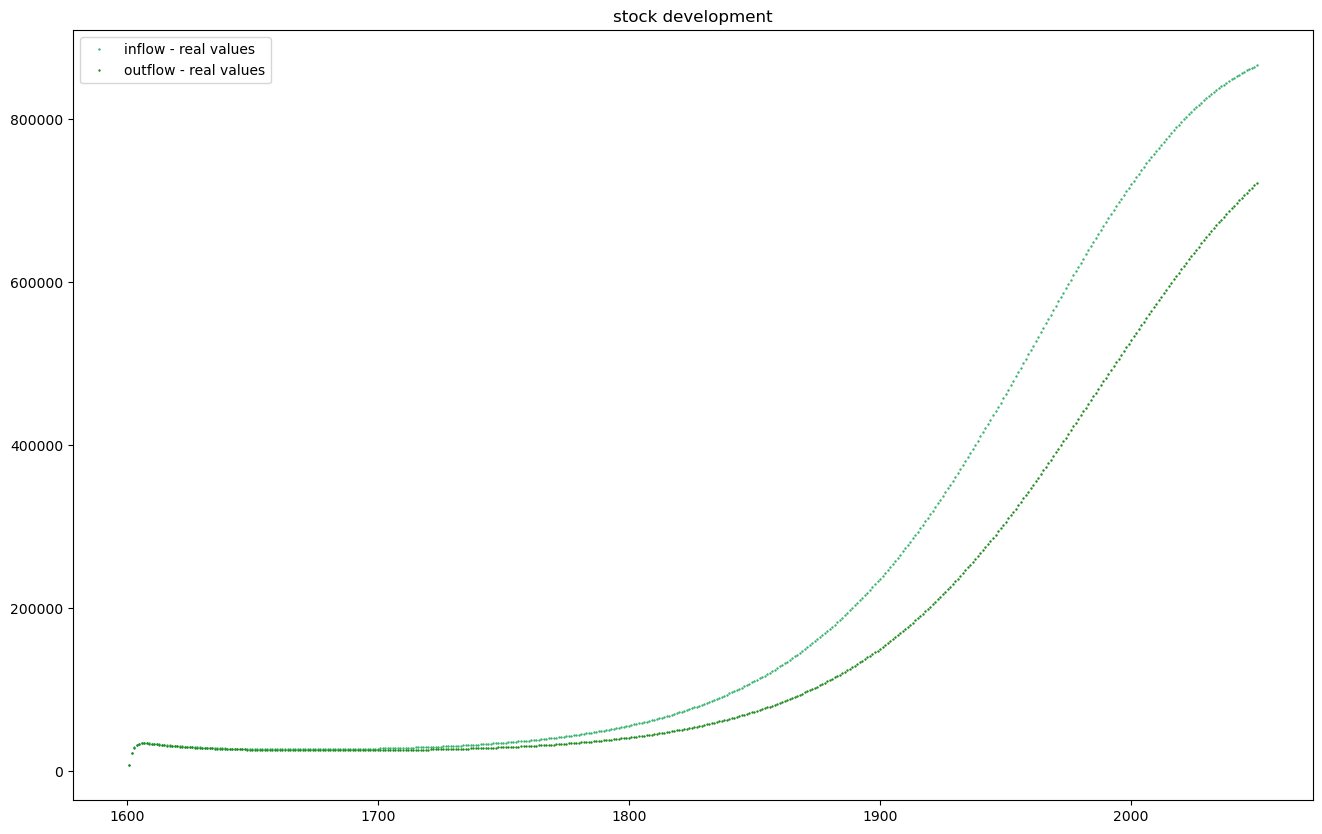

,Population,Stock,Stock per capita,Stock change,Inflow,Outflow,Stock AB,Stock MFH,Stock SFH,Stock TH
Unnamed: 0,,,,,,,,,,
1600,2.937747e+05,1.014099e+06,3.451961,NaN,NaN,NaN,1.255182e+02,4.083741e+05,2.022826e+05,4.033166e+05
1601,2.989405e+05,1.014384e+06,3.393264,284.936764,7542.018224,7257.081460,0.000000e+00,4.057034e+05,2.001224e+05,4.085580e+05
1602,3.041969e+05,1.014675e+06,3.335585,290.693093,22012.980223,21722.287130,0.000000e+00,4.029968e+05,1.979511e+05,4.137266e+05
1603,3.095455e+05,1.014971e+06,3.278907,296.565622,29160.013856,28863.448234,0.000000e+00,4.003046e+05,1.957938e+05,4.188726e+05
1604,3.149880e+05,1.015274e+06,3.223213,302.556693,32413.714309,32111.157616,0.000000e+00,3.976270e+05,1.936505e+05,4.239961e+05
...,...,...,...,...,...,...,...,...,...,...
2046,5.536865e+07,2.916042e+07,0.526659,150096.897833,859906.915241,709810.017407,1.531559e+06,1.056326e+07,1.415238e+07,2.913227e+06
2047,5.544026e+07,2.930911e+07,0.528661,148691.824280,861563.143917,712871.319637,1.553133e+06,1.069135e+07,1.432591e+07,2.738723e+06
2048,5.551080e+07,2.945639e+07,0.530643,147277.022879,863166.811364,715889.788485,1.574817e+06,1.082002e+07,1.450014e+07,2.561412e+06


In [35]:
lifetime = {
    'Type': 'LogNormal',
    'Mean': np.array([50]),
    'StdDev': np.array([25])
}

flow = dsm.DynamicStockModel(t=DSM.index,name="total dwelling stock",s=np.array(DSM['Stock']),lt=lifetime)

S_C, O_C, I = flow.compute_stock_driven_model()
O = flow.compute_outflow_total()
DS = flow.compute_stock_change()

#display(I)
#display(O)

def logistic_stock(x:np.ndarray,ti:float,tau:float,C0:float,C1:float) -> np.ndarray:
    """
    General logistic function.
    Arguments:
    - x: np.ndarray of observation points (time)
    - ti: inflection time
    - tau: transition time coefficient
    - C0: start value
    - C1: end value
    Returns:
    - np.ndarray with len(x) number of points
    """
    return (C1 - C0)/(1 + np.exp(-(x - ti) / tau)) + C0  

DSM_model = DSM.copy(deep=True)
#DSM_model = DSM.set_index('Unnamed: 0')
DSM_model.index.Name = None
display(DSM_model)

inputs = DSM.index
outputs = DSM["Population"]
pred_inputs = DSM_model.index

popt, pcov = curve_fit(logistic_stock, DSM.index, O, bounds = ([min(inputs), 0, 10**3, 10**6], [max(inputs), 10**5, 10**6, 10**8]))
O_model = logistic_stock(DSM_model.index, *popt)

popt, pcov = curve_fit(logistic_stock, DSM.index, I, bounds = ([min(inputs), 0, 10**3, 10**6], [max(inputs), 10**5, 10**6, 10**8]))
I_model = logistic_stock(DSM_model.index, *popt)

print('Input in year 2022: ', I[2022-1600])
print('Output in year 2022: ', O[2022-1600])
print('I is: ', len(I))
print('O is: ', len(O))

plt.figure(figsize=(16,10))
#plt.plot(year, stock, 'x', color = 'red', markersize = 4, label = f'stock')
plt.plot(DSM_model.index[1:], I[1:], '+', color = 'mediumseagreen', markersize = 2, label = f'inflow - real values')
#plt.plot(DSM_model.index, I_model, color = 'mediumseagreen', markersize = 1, label = f'inflow - regression', alpha=0.7)
plt.plot(DSM_model.index[1:], O[1:], '+', color = 'forestgreen', markersize = 2, label = f'outflow - real values')
#plt.plot(DSM_model.index, O_model, color = 'forestgreen', markersize = 1, label = f'outflow - regression', alpha=0.7)
plt.title('stock development')
plt.legend()
plt.show()

DSM_model['Outflow'][1:] = O[1:]
DSM_model['Inflow'][1:] = I[1:]

display(DSM_model)

In [43]:
type_buildings = ['AB','MFH','SFH','TH']

# Find average numbers for the data below ? 

AB_per_bduiling = 50
MFH_per_bduiling = 5
SFH_per_bduiling = 1
TH_per_bduiling = 2

Outflow_per_type = DSM_model.loc[:,'Stock AB':'Stock TH'].copy(deep=True)
Inflow_per_type = DSM_model.loc[:,'Stock AB':'Stock TH'].copy(deep=True)

Outflow_per_type.columns = type_buildings
Outflow_per_type.index.name = None
Inflow_per_type.columns = type_buildings
Inflow_per_type.index.name = None

Inflow_per_type.loc[1600] = [None,None,None,None]
Outflow_per_type.loc[1600] = [None,None,None,None]

display(Inflow_per_type)
display(Outflow_per_type)

def flow_per_type(DSM,Flow):
    for i in Flow.index[1:]:
        for j in Flow.columns:
            

,AB,MFH,SFH,TH
1600,NaN,NaN,NaN,NaN
1601,0.000000e+00,4.057034e+05,2.001224e+05,4.085580e+05
1602,0.000000e+00,4.029968e+05,1.979511e+05,4.137266e+05
1603,0.000000e+00,4.003046e+05,1.957938e+05,4.188726e+05
1604,0.000000e+00,3.976270e+05,1.936505e+05,4.239961e+05
...,...,...,...,...
2046,1.531559e+06,1.056326e+07,1.415238e+07,2.913227e+06
2047,1.553133e+06,1.069135e+07,1.432591e+07,2.738723e+06
2048,1.574817e+06,1.082002e+07,1.450014e+07,2.561412e+06
2049,1.596610e+06,1.094926e+07,1.467507e+07,2.381307e+06


,AB,MFH,SFH,TH
1600,NaN,NaN,NaN,NaN
1601,0.000000e+00,4.057034e+05,2.001224e+05,4.085580e+05
1602,0.000000e+00,4.029968e+05,1.979511e+05,4.137266e+05
1603,0.000000e+00,4.003046e+05,1.957938e+05,4.188726e+05
1604,0.000000e+00,3.976270e+05,1.936505e+05,4.239961e+05
...,...,...,...,...
2046,1.531559e+06,1.056326e+07,1.415238e+07,2.913227e+06
2047,1.553133e+06,1.069135e+07,1.432591e+07,2.738723e+06
2048,1.574817e+06,1.082002e+07,1.450014e+07,2.561412e+06
2049,1.596610e+06,1.094926e+07,1.467507e+07,2.381307e+06
